<a href="https://colab.research.google.com/github/charlyBraga/DeepLEarning_caffeeLeaves/blob/main/IA_Avaliacao_coffee_leaf_Charly_Braga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introdução

**Atividade 11 - Avaliação 1**

Disciplina: Inteligência Artificial

Curso: Poscomp UNIFEI

Professor: Dr. Carlos Henrique Valério de Moraes

Aluno: Charly Braga Ventura - 2020102039

Atividade: Criar uma Deep Learning CNN para reconhecer folhas de café saudáveis e doentes, sendo dois tipos, miner ou rust


---
**Dataset original:**

O dataset original se encontra em:
https://github.com/esgario/lara2018/tree/master/classifier/dataset/symptom

Foram utilizados apenas folhas das classes health, miner e rust, dos diretórios train, validation e test

O diretório dentro de treino foram renomeadas para health_train, miner_train e rust_train. Os outros diretórios seguem a mesma lógicas.

Por fim, o dataset foi zimpado, separamente armazenado no google drive, cujos os links estão no bloco aqui no Colab de download de dataset

---
**Algumas fontes de pesquisa:**

https://keras.io/api/preprocessing

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://www.tensorflow.org/guide/data

https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

https://stackoverflow.com/questions/64687375/get-labels-from-dataset-when-using-tensorflow-image-dataset-from-directory









---
###Cria diretórios
Neste bloco inicial do código, estamos criandos diretórios onde serão armazenadas as imagens baixadas. As imagens de folhas de para treino, validação e teste serão armazenadas no seguintes diretórios:
- /content/train
- /content/valid
- /content/test

In [ ]:
import os
import shutil
import time
root = '/content/' 
#limpa diretório /content/sample_data
if os.path.exists(root+'sample_data'):
  shutil.rmtree(root+'sample_data')
#Cria diretórios em /content
train_path = root+'train/'
valid_path = root+'valid/'
test_path = root+'test/'
if not os.path.exists(train_path):
  os.makedirs(train_path)
if not os.path.exists(valid_path):
  os.makedirs(valid_path)
if not os.path.exists(test_path):
  os.makedirs(test_path)
time.sleep(200)

---
### Download de datasets

Aqui é feito o download do dataset, os quais estão zipados e armazendos no google. Assim serão um total de 9 downloadas diferentes para, tipos de doenças diferenças e treino, validação e teste. São um total de 2079 imagens, 277 para folhas saudáveis (health), 1287 imagens de folhas com a doença rust e 515 de folhas com doença do tipo miner. A divisão é aproximadamente 70% para treino, 15% para validação e 15% para teste.


In [ ]:
from zipfile import ZipFile

## Download arquivos de treino ##
#Download de health_train
!wget "https://drive.google.com/uc?export=download&id=1AdJUT7TecFfWl-vMIiHhCGPRGhNfcu0s"
#extrai zip baixado
with ZipFile("uc?export=download&id=1AdJUT7TecFfWl-vMIiHhCGPRGhNfcu0s", 'r') as leaves:
   leaves.extractall()
#removi zip
!rm -rf "uc?export=download&id=1AdJUT7TecFfWl-vMIiHhCGPRGhNfcu0s" 

#Download de miner_train
!wget "https://drive.google.com/uc?export=download&id=1vM5TjIPBH5ZmzYweXXNI82Vk00IcAo5o"
with ZipFile("uc?export=download&id=1vM5TjIPBH5ZmzYweXXNI82Vk00IcAo5o", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1vM5TjIPBH5ZmzYweXXNI82Vk00IcAo5o"

#Download de hust_train
!wget "https://drive.google.com/uc?export=download&id=1eSLtiVq6NGstMb53K3DT6rqBATQU3sX9"
with ZipFile("uc?export=download&id=1eSLtiVq6NGstMb53K3DT6rqBATQU3sX9", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1eSLtiVq6NGstMb53K3DT6rqBATQU3sX9"

## Download arquivos de validação ##
#Download de health_valid
!wget "https://drive.google.com/uc?export=download&id=1b8kdVL3fKayukDmq5JgkCKNRo6Bjjxwd"
with ZipFile("uc?export=download&id=1b8kdVL3fKayukDmq5JgkCKNRo6Bjjxwd", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1b8kdVL3fKayukDmq5JgkCKNRo6Bjjxwd"

#Download de miner_valid   
!wget "https://drive.google.com/uc?export=download&id=1xp9Byjyxo2lfAtuRxEIwoKd0B9wlPl_q"
with ZipFile("uc?export=download&id=1xp9Byjyxo2lfAtuRxEIwoKd0B9wlPl_q", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1xp9Byjyxo2lfAtuRxEIwoKd0B9wlPl_q"

#Download de rust_valid  
!wget "https://drive.google.com/uc?export=download&id=1tLxZkEB2nnEbL6Ko8JM4t3fSv_te4xgo"
with ZipFile("uc?export=download&id=1tLxZkEB2nnEbL6Ko8JM4t3fSv_te4xgo", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1tLxZkEB2nnEbL6Ko8JM4t3fSv_te4xgo"

## Download arquivos de teste ##
#Download de health_test  
!wget "https://drive.google.com/uc?export=download&id=1ECA09GvwHWIh2-q77UdzqNG7O7L5lWkm"
with ZipFile("uc?export=download&id=1ECA09GvwHWIh2-q77UdzqNG7O7L5lWkm", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1ECA09GvwHWIh2-q77UdzqNG7O7L5lWkm"

#Download de miner_test 
!wget "https://drive.google.com/uc?export=download&id=1fFq--_Q-wJNXlk_Kv8loJ2XhOsFCSOF4"
with ZipFile("uc?export=download&id=1fFq--_Q-wJNXlk_Kv8loJ2XhOsFCSOF4", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1fFq--_Q-wJNXlk_Kv8loJ2XhOsFCSOF4"

#Download de hust_test  
!wget "https://drive.google.com/uc?export=download&id=1BfZykLOOWAgV4gxG6E3aMupl2Vz7YPEI"
with ZipFile("uc?export=download&id=1BfZykLOOWAgV4gxG6E3aMupl2Vz7YPEI", 'r') as leaves:
   leaves.extractall()
!rm -rf "uc?export=download&id=1BfZykLOOWAgV4gxG6E3aMupl2Vz7YPEI"

time.sleep(200)

--2021-07-09 14:00:31--  https://drive.google.com/uc?export=download&id=1AdJUT7TecFfWl-vMIiHhCGPRGhNfcu0s
Resolving drive.google.com (drive.google.com)... 74.125.142.101, 74.125.142.100, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mm53s90vt0jc1h8r014253b8ulk3a5bg/1625839200000/01711959911595782951/*/1AdJUT7TecFfWl-vMIiHhCGPRGhNfcu0s?e=download [following]
--2021-07-09 14:00:32--  https://doc-0c-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mm53s90vt0jc1h8r014253b8ulk3a5bg/1625839200000/01711959911595782951/*/1AdJUT7TecFfWl-vMIiHhCGPRGhNfcu0s?e=download
Resolving doc-0c-90-docs.googleusercontent.com (doc-0c-90-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0c-90-docs.googleusercontent.com (doc-0c

---
### Move diretórios
Move diretório baixados para train, valid e test. Assim fica padronizado para o Keras encontrar as imagens e classificar de acordo com a subpasta que tiver as imagens.

In [ ]:
#Move tudo para dir train
shutil.move('health_train', train_path+'health_train')
shutil.move('miner_train', train_path+'miner_train')
shutil.move('rust_train', train_path+'rust_train')
#Move tudo para dir valid
shutil.move('health_valid', valid_path+'health_valid')
shutil.move('miner_valid', valid_path+'miner_valid')
shutil.move('rust_valid', valid_path+'rust_valid')
#Move tudo para dir test
shutil.move('health_test', test_path+'health_test')
shutil.move('miner_test', test_path+'miner_test')
shutil.move('rust_test', test_path+'rust_test')

time.sleep(200)

---
### Variáveis de dados

Define variáveis para treino, validação e teste e pré-configura. As imagens são padronizadas na dimensão 256x256. Os labels, que é o y da rede, vai ser criado de acordo com as subpasta do treino, validação e teste. Por exemplo, na pasta /content/train tem as subpastas healt_train, miner_train e rust_train. Assim o keras vai criar três classes para o treino. Isto é parecido para validação e teste. modo do label é categoria, pois existe mais de 2 saídas possíveis.

In [ ]:
import tensorflow as tf
from tensorflow import keras


##Cria variável de TREINO (train) com três classes de acordo com subpastas (imgs e labels)
#Remove ".ipynb_checkpoints" para não contar como classe
if os.path.exists(root+'train/.ipynb_checkpoints'):
  shutil.rmtree(root+'train/.ipynb_checkpoints') 
#Coleta imagens de treino e criar labels de três class (health_train, miner_train, rust_train)
train = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred', #labels criadas baseadas em subpastas
    label_mode='categorical', # mias de duas saíds possíves
    batch_size=32,
    image_size=(256, 256)) #imagem redimensionada em 256x256

##Cria variável de VALIDAÇÃO (valid) com três classes de acordo com subpastas (imgs e labels)
#Remove ".ipynb_checkpoints"
if os.path.exists(root+'t/.ipynb_checkpoints'):
  shutil.rmtree(root+'test/.ipynb_checkpoints') 
#Coleta imagens de validação e criar labels de três class (health_valid, miner_valid, rust_valid)
valid = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/valid/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

##Cria variável de TESTE (test) com três classes de acordo com subpastas (imgs e labels)
#Remove ".ipynb_checkpoints"
if os.path.exists(root+'test/.ipynb_checkpoints'):
  shutil.rmtree(root+'test/.ipynb_checkpoints') 
#Coleta imagens de TESTE e criar labels de três class (health_test, miner_test, rust_test)
test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=root+'test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

Found 1287 files belonging to 3 classes.
Found 515 files belonging to 3 classes.
Found 277 files belonging to 3 classes.


---
###Compila o modelo

Configura o modelo, ou seja, quais métricas devem ser calculadas, qual será o otimizados e o loss, por exemplo. Como estamos trabalhando com categoria, ou seja, temos mais de duas saídas posíveis, estamos usando para loss="categorical_crossentropy". O otimizador para corrigir o erro, de acordo com loss, é optimizer='rmsprop', escolhido pelo Keras de acordo com o problema. Algumas das métricas utilizadas aqui são Acurácia, Precisão Recall.

In [ ]:
model = keras.applications.Xception(weights=None, input_shape=(256, 256, 3), classes=3)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.categorical_accuracy,
                       tf.keras.metrics.AUC(
                            num_thresholds=200, curve='ROC',
                            summation_method='interpolation', name=None, dtype=None,
                            thresholds=None, multi_label=True, num_labels=None, label_weights=None,
                            from_logits=False),
                       tf.keras.metrics.Precision(#Computes the precision of the predictions with respect to the labels.
                            thresholds=None, top_k=None, class_id=None, name=None, dtype=None),
                       tf.keras.metrics.Recall(
                            thresholds=None, top_k=None, class_id=None, name=None, dtype=None),                   
                        tf.keras.metrics.TruePositives(
                            thresholds=None, name=None, dtype=None),
                        tf.keras.metrics.TrueNegatives(
                            thresholds=None, name=None, dtype=None),
                        tf.keras.metrics.FalsePositives(
                            thresholds=None, name=None, dtype=None),
                        tf.keras.metrics.FalseNegatives(
                            thresholds=None, name=None, dtype=None)
                      ]
             )

---

###Realiza Treino, Validação e cria Modelo
Configuração: O treino foi configurado para 50 épocas, porém o treino pode parar prematuramente caso o aprendizado esteja estabilizado, ou seja, a rede deixa de aprender. 

Resultado: a Rede treinou por 50 épocas, demorando um pouco mais de 33 minutos. As o resultado das métricas podem ser vistos na saída, como acurácia, precisão, recall, integral abaixo da curva ROC, total de verdadeiros positivos e negativos, e total de falsos postivos e negativos, que pode ser visto tanto para treino como para validação. Além disso, pode ser o visto o erro reduzindo ao longo das épocas, ou seja, a rede está aprendendo. Quando o erro começa a estabilizar, siguinifica que a rede deixou de aprender.

In [ ]:
import matplotlib.pyplot as plt
from time import time

def def_train(epochs):
  my_epochs = epochs
  #para mais cedo quando a rede passa muitos épocas sem aprender
  early_stopping_patience = 50
  early_stopping = keras.callbacks.EarlyStopping(
      monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
  )

  #marca tempo inicial do trieno
  t_start = time()
  #Realiza o treino da rede e armazena resultados em history
  history = model.fit(
      train, 
      epochs=my_epochs,
      validation_data=valid,    
      callbacks=[early_stopping])


  #marca tempo final do treino
  t_end = time()
  t_train_seg = t_end - t_start
  t_train_min = t_train_seg/60
  print('Train time (seg): %.2f'  % t_train_seg)
  print('Train time (min): %.2f'  % t_train_min)
  plt.plot(history.history['loss']) #imprime o gráfico de erro
  plt.show()

Epoch 1/20
41/41 [==============================] - 44s 438ms/step - loss: 1.2016 - categorical_accuracy: 0.6931 - auc: 0.7957 - precision: 0.7250 - recall: 0.6208 - true_positives: 799.0000 - true_negatives: 2271.0000 - false_positives: 303.0000 - false_negatives: 488.0000 - val_loss: 1.0496 - val_categorical_accuracy: 0.5767 - val_auc: 0.5201 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_true_negatives: 1030.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 515.0000
Epoch 2/20
41/41 [==============================] - 16s 377ms/step - loss: 0.4774 - categorical_accuracy: 0.8291 - auc: 0.9268 - precision: 0.8390 - recall: 0.8096 - true_positives: 1042.0000 - true_negatives: 2374.0000 - false_positives: 200.0000 - false_negatives: 245.0000 - val_loss: 1.0243 - val_categorical_accuracy: 0.5767 - val_auc: 0.6226 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_positives: 0.0000e+00 - val_true_negatives: 1030.0000 - v

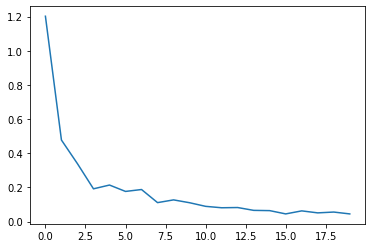

In [ ]:
def_train(20)

In [ ]:
print('Accuracy test:')
model.evaluate(test)
#model.save('model.h5')

Accuracy test:
9/9 [==============================] - 1s 112ms/step - loss: 0.1503 - categorical_accuracy: 0.9567 - auc: 0.9945 - precision: 0.9565 - recall: 0.9531 - true_positives: 264.0000 - true_negatives: 542.0000 - false_positives: 12.0000 - false_negatives: 13.0000


[0.15030516684055328,
 0.9566786885261536,
 0.9945456385612488,
 0.95652174949646,
 0.9530686140060425,
 264.0,
 542.0,
 12.0,
 13.0]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np

y_test2 = tf.concat([y for x, y in test], axis=0)
labels= np.argmax(y_test2, axis=1)

x_test2 = tf.concat([x for x, y in test], axis=0)
x_values= np.argmax(x_test2, axis=1)

x_test2
#model.evaluate(x_values, labels)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np


y_pred = model.predict(test)
predicted_categories = tf.argmax(y_pred, axis=1)
y_test = tf.concat([y for x, y in test], axis=0)
true_categories = np.argmax(y_test, axis=1)
i=0
'''
  for name in test.class_names:
    print(str(i)+": "+str(name))
    i += 1
'''
print('Confusion Matrix')
confusion_matrix(true_categories, predicted_categories)
#confusion_matrix(true_categories, predicted_categories, labels=["health_test", "miner_test", "rust_valid"])

In [ ]:
y_pred.shape

(277, 3)

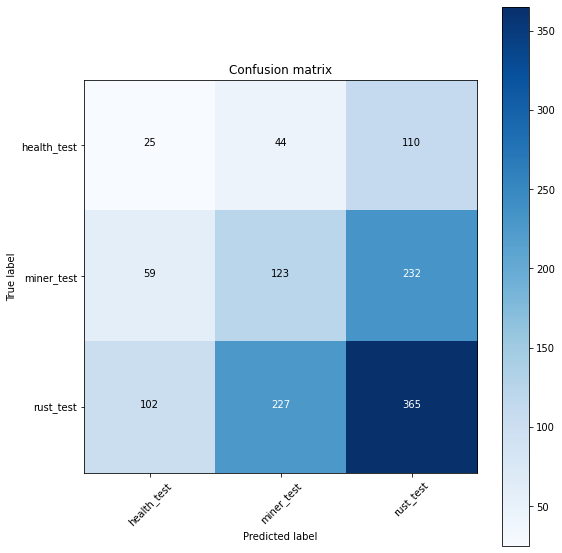

In [ ]:
import itertools   
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np 
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    #cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    figure

# Use the model to predict the values from the test_images.
test_pred_raw = model.predict(train)
test_pred = np.argmax(test_pred_raw, axis=1)

y_test = tf.concat([y for x, y in train], axis=0)
test_labels = np.argmax(y_test, axis=1)


# Calculate the confusion matrix using sklearn.metrics
cm = confusion_matrix(y_true=test_labels, y_pred=test_pred)

plot_confusion_matrix(cm, class_names=test.class_names)



In [ ]:
y_test 

<tf.Tensor: shape=(1287, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)>

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y., pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    
test_labels.
plot_roc(test_pred, test_labels)

ValueError: ignored

In [ ]:
import itertools 
import io
def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=3)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

# Use the model to predict the values from the test_images.
test_pred_raw = model.predict(test)
test_pred = np.argmax(test_pred_raw, axis=1)

y_test = tf.concat([y for x, y in test], axis=0)
test_labels = np.argmax(y_test, axis=1)


# Calculate the confusion matrix using sklearn.metrics
cm = confusion_matrix(test_labels, test_pred)

figure = plot_confusion_matrix(cm, class_names=test.class_names)
cm_image = plot_to_image(figure)
cm_image
# Log the confusion matrix as an image summary.
#with file_writer_cm.as_default():
 #   tf.summary.image("Confusion Matrix", cm_image, step=epoch)

<tf.Tensor: shape=(1, 576, 576, 3), dtype=uint8, numpy=
array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255

In [ ]:
t=0
p=0
count=0
print(len(true_categories))
print(predicted_categories[p])
for i in true_categories: 
  if (true_categories[i] == predicted_categories[p]):
    count += 1
  t += 1 
  p += 1
  acc= count / len(true_categories)
print(acc)

277
tf.Tensor(0, shape=(), dtype=int64)
0.41155234657039713


In [ ]:
#Roc Curve
#https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

'''
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes = 3
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(test_labels [:, i], y_test[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
'''

In [ ]:
import tensorflow as tf
from tensorflow import keras


##Cria variável de TREINO (train) com três classes de acordo com subpastas (imgs e labels)
#Remove ".ipynb_checkpoints" para não contar como classe
if os.path.exists(root+'train/.ipynb_checkpoints'):
  shutil.rmtree(root+'train/.ipynb_checkpoints') 
#Coleta imagens de treino e criar labels de três class (health_train, miner_train, rust_train)
train2 = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred', #labels criadas baseadas em subpastas
    label_mode='categorical', # mias de duas saíds possíves
    batch_size=32,
    image_size=(256, 256)) #imagem redimensionada em 256x256

##Cria variável de VALIDAÇÃO (valid) com três classes de acordo com subpastas (imgs e labels)
#Remove ".ipynb_checkpoints"
if os.path.exists(root+'t/.ipynb_checkpoints'):
  shutil.rmtree(root+'test/.ipynb_checkpoints') 
#Coleta imagens de validação e criar labels de três class (health_valid, miner_valid, rust_valid)
valid2 = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/valid/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

##Cria variável de TESTE (test) com três classes de acordo com subpastas (imgs e labels)
#Remove ".ipynb_checkpoints"
if os.path.exists(root+'test/.ipynb_checkpoints'):
  shutil.rmtree(root+'test/.ipynb_checkpoints') 
#Coleta imagens de TESTE e criar labels de três class (health_test, miner_test, rust_test)
test2 = tf.keras.preprocessing.image_dataset_from_directory(
    directory=root+'test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256))

In [ ]:
model = keras.applications.Xception(weights=None, input_shape=(256, 256, 3), classes=3)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.categorical_accuracy,
                       tf.keras.metrics.AUC(
                            num_thresholds=200, curve='ROC',
                            summation_method='interpolation', name=None, dtype=None,
                            thresholds=None, multi_label=True, num_labels=None, label_weights=None,
                            from_logits=False),
                       tf.keras.metrics.Precision(#Computes the precision of the predictions with respect to the labels.
                            thresholds=None, top_k=None, class_id=None, name=None, dtype=None),
                       tf.keras.metrics.Recall(
                            thresholds=None, top_k=None, class_id=None, name=None, dtype=None),                   
                        tf.keras.metrics.TruePositives(
                            thresholds=None, name=None, dtype=None),
                        tf.keras.metrics.TrueNegatives(
                            thresholds=None, name=None, dtype=None),
                        tf.keras.metrics.FalsePositives(
                            thresholds=None, name=None, dtype=None),
                        tf.keras.metrics.FalseNegatives(
                            thresholds=None, name=None, dtype=None)
                      ]
             )

In [ ]:
import matplotlib.pyplot as plt
from time import time

def def_train2(epochs):
  my_epochs = epochs
  #para mais cedo quando a rede passa muitos épocas sem aprender
  early_stopping_patience = 50
  early_stopping = keras.callbacks.EarlyStopping(
      monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
  )

  #marca tempo inicial do trieno
  t_start = time()
  #Realiza o treino da rede e armazena resultados em history
  history = model.fit(
      train2, 
      epochs=my_epochs,
      validation_data=valid2,    
      callbacks=[early_stopping])


  #marca tempo final do treino
  t_end = time()
  t_train_seg = t_end - t_start
  t_train_min = t_train_seg/60
  print('Train time (seg): %.2f'  % t_train_seg)
  print('Train time (min): %.2f'  % t_train_min)
  plt.plot(history.history['loss']) #imprime o gráfico de erro
  plt.show()

In [ ]:
def_train2(100)

print('Accuracy test:')
model.evaluate(test2)

model.evaluate(test)
y_pred = model.predict(test2)
predicted_categories = tf.argmax(y_pred, axis=1)
y_test = tf.concat([y for x, y in test2], axis=0)
true_categories = np.argmax(y_test,axis=1)
i=0
for name in test.class_names:
  print(str(i)+": "+str(name))
  i += 1
print('Confusion Matrix')
multilabel_confusion_matrix(true_categories, predicted_categories)
#confusion_matrix(true_categories, predicted_categories, labels=["health_test", "miner_test", "rust_valid"])


---
###Teste e predição
Aqui a rede já foi treinada e validada. Ela já está pronta para ser testada. Poderia ser colocada em produção, por exemplo, caso o modelo seja. Nesta fase se usa base dados de imagens que não foram utilizadas no treino e validação. As mesmas métricas são aplicadas aqui: Acurácia, Precisão, Recall, quantidade total de Verdadeiros positivos e negativos, Falsos positivos e negativos.

In [ ]:
model.evaluate(test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np
y_pred = model.predict(test)
predicted_categories = tf.argmax(y_pred, axis=1)
y_test = tf.concat([y for x, y in test], axis=0)
true_categories = np.argmax(y_test,axis=1)
i=0
for name in test.class_names:
  print(str(i)+": "+str(name))
  i += 1
print('Confusion Matrix')
multilabel_confusion_matrix(true_categories, predicted_categories)
#confusion_matrix(true_categories, predicted_categories, labels=["health_test", "miner_test", "rust_valid"])


In [ ]:
imgs, labels = next(test)
plots(imgs, titles=labels)
prediction = mymodel.predict(x)
#return position of max
MaxPosition=np.argmax(prediction)  
prediction_label=classes[MaxPosition]
print(prediction_label) 

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(names(train_labels[i][0]))
plt.show()

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 10))
for batch in train.take(1):
  batch.index
    images = batch[0]
    labels = batch[0]
    for i in range(2):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(str(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()


---
###Plota diagrama do modelo

Plota o detalhe do modelo com as ligações e várias camadas. A rede é uma deep learing CNN, cuja connfiguração foi criada pelos Keras baseada no problema deste trabalho e quantidade de classes

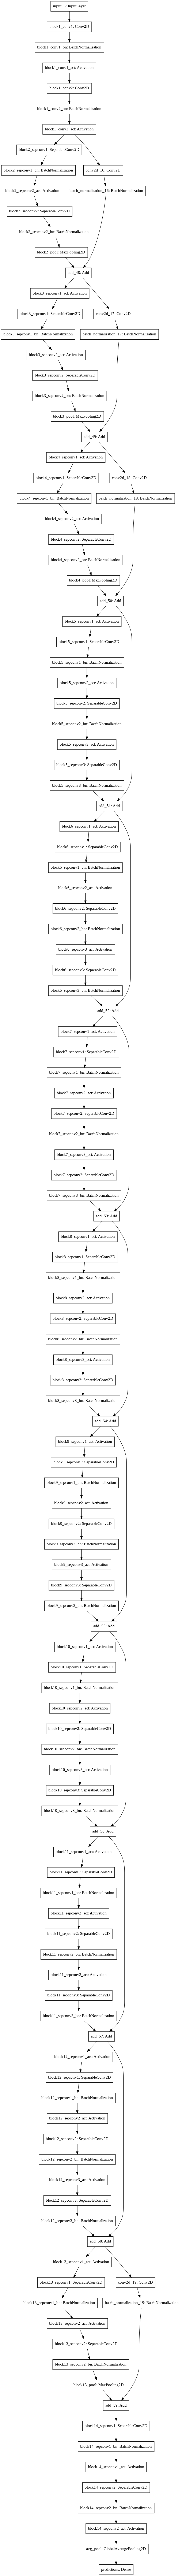

In [ ]:
keras.utils.plot_model(model, to_file='model.png')

---

---
###Função summary()
Tem um resumo descritivo do nosso treino, em cada etapa, como a quantidade de parâmetros e dimensões das entradas. 

In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

---
## Trabalhos futuros

Abaixo foi realizada a segmentação e visualização de imagens de folhas completas para avaliar gravidade de doenças em folhas de café. Porém esta parte ficará para trabalhos futuros.

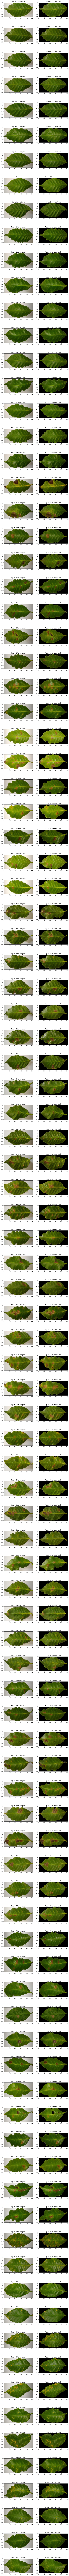

In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2 as cv

cols = 2 #num of column for show images
#@title Selecione a qtdd de imagens para usar
imgs_qtdd = 104 #@param {type:"slider", min:1, max:1740, step:1}
img_ext = '.jpg' #file extesion 

img_dir='./leaf/' #path of images


j=0 #itarator por show images
fig=plt.figure(figsize=(10,imgs_qtdd*4))

for i in range(1,imgs_qtdd,1): #run the images
  img_name= str(i) #get image name (number)
  img_fullpath = img_dir + img_name  + img_ext
  try:#trye open image file 
    img0  = np.array(Image.open(img_fullpath))
  except: 
    print(img_fullpath + " não encontrada!")
    continue #go next i
  img1 = img0.shape[:2] #change only channel for image shape
  mask = np.zeros(img1 ,np.uint8)#create mask 
  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)
  rect = (1,1,500,250)
  cv.grabCut(img0,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
  mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
  img3 = img0*mask2[:,:,np.newaxis]
  ## Plot original image 
  j=j+1
  f1 = fig.add_subplot(imgs_qtdd, cols, j) #(rows, cols, i)
  subplot_title=("Figura "+str(i) + '.a - original')
  f1.set_title(subplot_title)  
  plt.imshow(img0)
  ##Plot cut image
  j=j+1
  f2 = fig.add_subplot(imgs_qtdd, cols, j) #(rows, cols, i)
  subplot_title=("Figura "+str(i) + '.b - sem fundo')
  f2.set_title(subplot_title)  
  plt.imshow(img3)
plt.show()






###Referências:

https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html

https://dl.acm.org/doi/10.1145/1015706.1015720